## Why Stacking?

Sometime a single model is not good enough. So, you need to use multiple models to get a better result! It called stacking.

In [1]:
%%time
import malaya

CPU times: user 4.98 s, sys: 1.22 s, total: 6.2 s
Wall time: 7.31 s


In [3]:
albert = malaya.sentiment.transformer('albert')
multinomial = malaya.sentiment.multinomial()
alxlnet = malaya.sentiment.transformer('alxlnet')

INFO:tensorflow:loading sentence piece model


## Stack multiple sentiment models

`malaya.stack.predict_stack` provide an easy stacking solution for Malaya models. Well, not just for sentiment models, any classification models can use `malaya.stack.predict_stack`.

```python
def predict_stack(models, strings: List[str], mode: str = 'gmean', **kwargs):
    """
    Stacking for predictive models.

    Parameters
    ----------
    models: List[Callable]
        list of models.
    strings: List[str]
    mode : str, optional (default='gmean')
        Model architecture supported. Allowed values:

        * ``'gmean'`` - geometrical mean.
        * ``'hmean'`` - harmonic mean.
        * ``'mean'`` - mean.
        * ``'min'`` - min.
        * ``'max'`` - max.
        * ``'median'`` - Harrell-Davis median.


    Returns
    -------
    result: dict
    """
```

In [6]:
malaya.stack.predict_stack([albert, multinomial, alxlnet],
                          ['harga minyak tak menentu'])

[{'negative': 0.49219437524658893,
  'positive': 4.836121311772972e-05,
  'neutral': 0.004789010889416813}]

To disable `neutral`, simply, `add_neutral = False`.

In [7]:
malaya.stack.predict_stack([albert, multinomial, alxlnet],
                          ['harga minyak tak menentu'], add_neutral = False)

[{'negative': 0.8239995596048657, 'positive': 0.0019336028417252348}]

## Stack tagging models

For tagging models, we use majority voting stacking. So you need to need have more than 2 models to make it perfect, or else, it will pick randomly from 2 models. `malaya.stack.voting_stack` provides easy interface for this kind of stacking. **But only can use for Entites, POS and Dependency Parsing recognition.**

```python
def voting_stack(models, text):
    """
    Stacking for POS and Entities Recognition models.

    Parameters
    ----------
    models: list
        list of models
    text: str
        string to predict

    Returns
    -------
    result: list
    """
```

In [9]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

albert = malaya.pos.transformer('albert')
bert = malaya.pos.transformer('bert')
malaya.stack.voting_stack([albert, bert], string)

[('Kuala', 'PROPN'),
 ('Lumpur:', 'PROPN'),
 ('Sempena', 'ADP'),
 ('sambutan', 'NOUN'),
 ('Aidilfitri', 'PROPN'),
 ('minggu', 'NOUN'),
 ('depan,', 'ADJ'),
 ('Perdana', 'PROPN'),
 ('Menteri', 'PROPN'),
 ('Tun', 'PROPN'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('Mohamad', 'PROPN'),
 ('dan', 'CCONJ'),
 ('Menteri', 'PROPN'),
 ('Pengangkutan', 'PROPN'),
 ('Anthony', 'PROPN'),
 ('Loke', 'PROPN'),
 ('Siew', 'PROPN'),
 ('Fook', 'PROPN'),
 ('menitipkan', 'VERB'),
 ('pesanan', 'NOUN'),
 ('khas', 'ADJ'),
 ('kepada', 'ADP'),
 ('orang', 'NOUN'),
 ('ramai', 'ADJ'),
 ('yang', 'PRON'),
 ('mahu', 'ADV'),
 ('pulang', 'VERB'),
 ('ke', 'ADP'),
 ('kampung', 'NOUN'),
 ('halaman', 'NOUN'),
 ('masing-masing.', 'DET'),
 ('Dalam', 'ADP'),
 ('video', 'NOUN'),
 ('pendek', 'ADJ'),
 ('terbitan', 'NOUN'),
 ('Jabatan', 'PROPN'),
 ('Keselamatan', 'PROPN'),
 ('Jalan', 'PROPN'),
 ('Raya', 'PROPN'),
 ('(JKJR)', 'PUNCT'),
 ('itu,', 'DET'),
 ('Dr', 'PROPN'),
 ('Mahathir', 'PROPN'),
 ('menasihati', 'VERB'),
 ('mereka', 

In [10]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

xlnet = malaya.dependency.transformer(model = 'xlnet')
alxlnet = malaya.dependency.transformer(model = 'alxlnet')

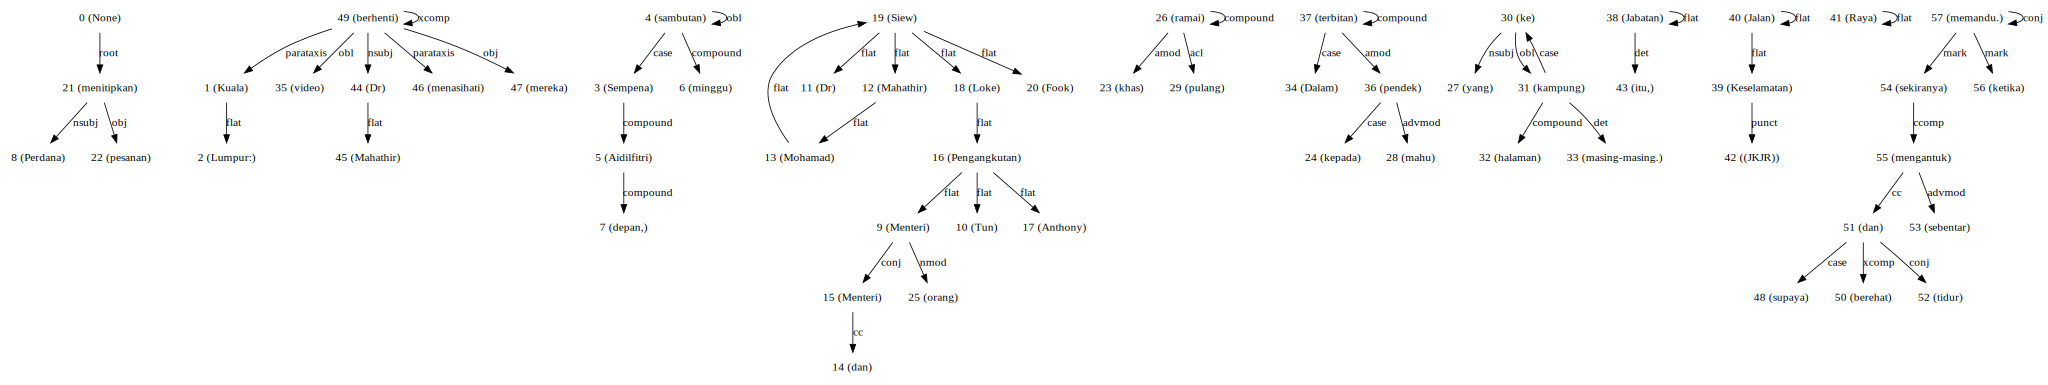

In [11]:
tagging, indexing = malaya.stack.voting_stack([xlnet, xlnet, alxlnet], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()